## Домашняя работа №7
Морозов Анатолий 3822Б1ПМоп2

**Постановка задачи**:

С данными датасета, выбранного для домашнего задания №1, решить задачу кластеризации 3 методами: KMeans, DBSCAN и любым другим на выбор. Сделать выводы.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import adjusted_rand_score, silhouette_score
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import optuna

In [3]:
data = pd.read_csv("https://raw.githubusercontent.com/mortolik/ML/refs/heads/main/Hotel%20Reservations.csv")

#Удаление целевой метки
data = data.drop(labels="Booking_ID", axis=1)

#Преобразование категориальных признаков
categorical_columns = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type', 'booking_status']
for col in categorical_columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])

#Нормализация данных
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.drop(columns=['booking_status']))

#Оверсэмплинг
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(data_scaled, data['booking_status'])

#Разделение данных на обучающую и тестовую выборки
X_res_train, X_res_test, y_res_train, y_res_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42)

### Кластеризация

**1) Метод KMeans:**

[I 2025-12-19 19:48:07,027] A new study created in memory with name: no-name-4f238690-8b3b-4d59-9790-3a57cef766a1
[I 2025-12-19 19:48:07,045] Trial 0 finished with value: 1.2730218917311301e-05 and parameters: {'n_clusters': 2}. Best is trial 0 with value: 1.2730218917311301e-05.
[I 2025-12-19 19:48:07,066] Trial 1 finished with value: 0.019660294744642957 and parameters: {'n_clusters': 4}. Best is trial 1 with value: 0.019660294744642957.
[I 2025-12-19 19:48:07,107] Trial 2 finished with value: 0.036906345551508776 and parameters: {'n_clusters': 7}. Best is trial 2 with value: 0.036906345551508776.
[I 2025-12-19 19:48:07,126] Trial 3 finished with value: 0.019660294744642957 and parameters: {'n_clusters': 4}. Best is trial 2 with value: 0.036906345551508776.
[I 2025-12-19 19:48:07,164] Trial 4 finished with value: 0.036906345551508776 and parameters: {'n_clusters': 7}. Best is trial 2 with value: 0.036906345551508776.
[I 2025-12-19 19:48:07,203] Trial 5 finished with value: 0.03530988

Результаты KMeans:
ARI: 0.04751499986067927
Silhouette Score: 0.1373051924847203


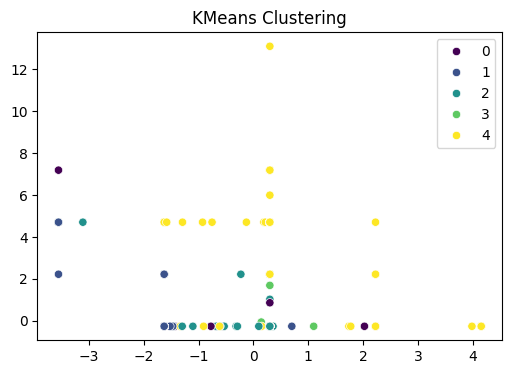

In [4]:
#Кластеризация
def objective_kmeans(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 10)
    clustering = KMeans(n_clusters=n_clusters, random_state=42).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_kmeans = optuna.create_study(direction="maximize")
study_kmeans.optimize(objective_kmeans, n_trials=20)
best_params_kmeans = study_kmeans.best_params

clustering_kmeans = KMeans(n_clusters=best_params_kmeans['n_clusters'], random_state=42).fit(X_res_test)
ari_kmeans = adjusted_rand_score(y_res_test, clustering_kmeans.labels_)
kmeans_silhouette = silhouette_score(X_res_test, clustering_kmeans.labels_)

print("Результаты KMeans:")
print(f"ARI: {ari_kmeans}")
print(f"Silhouette Score: {kmeans_silhouette}")

#Визуализация результатов
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_kmeans.labels_, palette='viridis')
plt.title('KMeans Clustering')
plt.show()

**2) Метод DBSCAN:**

[I 2025-12-19 19:48:09,767] A new study created in memory with name: no-name-52e77c5d-6752-4f1b-b673-0630dca097b8
[I 2025-12-19 19:48:11,774] Trial 0 finished with value: 0.0022332743743598516 and parameters: {'eps': 3.517100303264111, 'min_samples': 98}. Best is trial 0 with value: 0.0022332743743598516.
[I 2025-12-19 19:48:12,260] Trial 1 finished with value: 0.023975781541972156 and parameters: {'eps': 2.5730258344321113, 'min_samples': 195}. Best is trial 1 with value: 0.023975781541972156.
[I 2025-12-19 19:48:12,596] Trial 2 finished with value: 0.018383341295813982 and parameters: {'eps': 1.7495134209358225, 'min_samples': 145}. Best is trial 1 with value: 0.023975781541972156.
[I 2025-12-19 19:48:12,946] Trial 3 finished with value: 0.017055385804527402 and parameters: {'eps': 1.834598168331436, 'min_samples': 154}. Best is trial 1 with value: 0.023975781541972156.
[I 2025-12-19 19:48:13,703] Trial 4 finished with value: 0.0031263452843265896 and parameters: {'eps': 3.0258213990

Результаты DBSCAN:
ARI: 0.03516832939605928
Silhouette Score: 0.05994577552797399


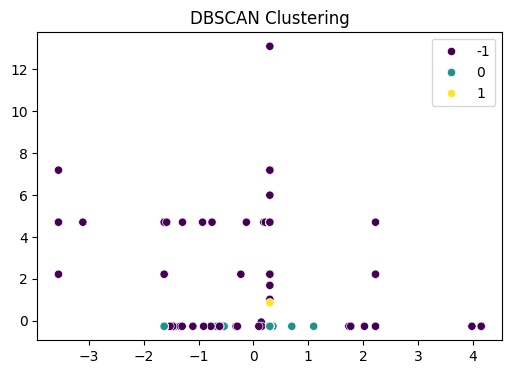

In [5]:
#Кластеризация
def objective_dbscan(trial):
    eps = trial.suggest_float('eps', 1.0, 5.0)
    min_samples = trial.suggest_int('min_samples', 10, 200)
    clustering = DBSCAN(eps=eps, min_samples=min_samples).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_dbscan = optuna.create_study(direction="maximize")
study_dbscan.optimize(objective_dbscan, n_trials=20)
best_params_dbscan = study_dbscan.best_params

clustering_dbscan = DBSCAN(**best_params_dbscan).fit(X_res_test)
ari_dbscan = adjusted_rand_score(y_res_test, clustering_dbscan.labels_)
dbscan_silhouette = silhouette_score(X_res_test, clustering_dbscan.labels_)

print("Результаты DBSCAN:")
print(f"ARI: {ari_dbscan}")
print(f"Silhouette Score: {dbscan_silhouette}")

#Визуализация результатов 
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_dbscan.labels_, palette='viridis')
plt.title('DBSCAN Clustering')
plt.show()

**3) Метод Agglomerative Clustering:**

[I 2025-12-19 19:48:36,631] A new study created in memory with name: no-name-11e71349-b73d-4c21-9d39-1b515ff41901
[I 2025-12-19 19:48:55,847] Trial 0 finished with value: 0.020501369684304296 and parameters: {'n_clusters': 9}. Best is trial 0 with value: 0.020501369684304296.
[I 2025-12-19 19:49:13,244] Trial 1 finished with value: 0.0012084456324151158 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.020501369684304296.
[I 2025-12-19 19:49:30,715] Trial 2 finished with value: 0.01148064388548527 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 0.020501369684304296.
[I 2025-12-19 19:49:47,585] Trial 3 finished with value: 0.01148064388548527 and parameters: {'n_clusters': 6}. Best is trial 0 with value: 0.020501369684304296.
[I 2025-12-19 19:50:04,020] Trial 4 finished with value: 0.020250082768910955 and parameters: {'n_clusters': 10}. Best is trial 0 with value: 0.020501369684304296.
[I 2025-12-19 19:50:19,276] Trial 5 finished with value: 0.001288468253

Результаты Agglomerative Clustering:
ARI: 0.027819979269170656
Silhouette Score: 0.14579353258125452


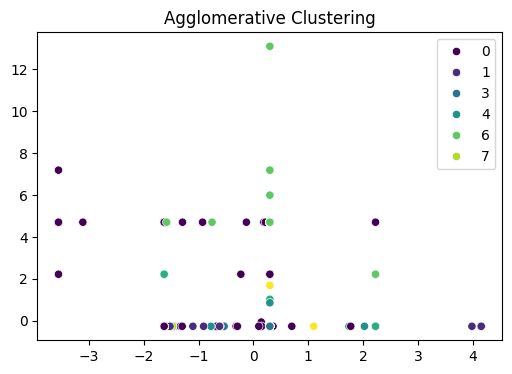

In [6]:
#Кластеризация
def objective_agglomerative(trial):
    n_clusters = trial.suggest_int('n_clusters', 1, 10)
    clustering = AgglomerativeClustering(n_clusters=n_clusters).fit(X_res_train)
    return adjusted_rand_score(y_res_train, clustering.labels_)

study_agglomerative = optuna.create_study(direction="maximize")
study_agglomerative.optimize(objective_agglomerative, n_trials=20)
best_params_agglomerative = study_agglomerative.best_params

clustering_agglomerative = AgglomerativeClustering(n_clusters=best_params_agglomerative['n_clusters']).fit(X_res_test)
ari_agglomerative = adjusted_rand_score(y_res_test, clustering_agglomerative.labels_)
agglomerative_silhouette = silhouette_score(X_res_test, clustering_agglomerative.labels_)

print("Результаты Agglomerative Clustering:")
print(f"ARI: {ari_agglomerative}")
print(f"Silhouette Score: {agglomerative_silhouette}")

#Визуализация результатов 
plt.figure(figsize=(6, 4))
sns.scatterplot(x=X_res_test[:, 0], y=X_res_test[:, 1], hue=clustering_agglomerative.labels_, palette='viridis')
plt.title('Agglomerative Clustering')
plt.show()

**Итоговые выводы:**

In [7]:
#Сравнение результатов
table1 = [["KMeans", ari_kmeans, kmeans_silhouette],
          ["DBSCAN", ari_dbscan, dbscan_silhouette],
          ["Agglomerative", ari_agglomerative, agglomerative_silhouette]]
comparison_df = pd.DataFrame(table1, columns=["Метод", "ARI", "Silhouette Score"])
print(comparison_df)

#Выводы
print("Выводы:")
print(f"KMeans: ARI = {ari_kmeans}, Silhouette = {kmeans_silhouette}")
print(f"DBSCAN: ARI = {ari_dbscan}, Silhouette = {dbscan_silhouette}")
print(f"Agglomerative: ARI = {ari_agglomerative}, Silhouette = {agglomerative_silhouette}")

           Метод       ARI  Silhouette Score
0         KMeans  0.047515          0.137305
1         DBSCAN  0.035168          0.059946
2  Agglomerative  0.027820          0.145794
Выводы:
KMeans: ARI = 0.04751499986067927, Silhouette = 0.1373051924847203
DBSCAN: ARI = 0.03516832939605928, Silhouette = 0.05994577552797399
Agglomerative: ARI = 0.027819979269170656, Silhouette = 0.14579353258125452


- Все три метода кластеризации показали низкие значения, что указывает на то, что кластеризация не очень хорошо соответствует истинным меткам и не очень хорошо разделяет данные на кластеры.
- Метод KMeans показал лучшие результаты по ARI, что указывает на то, что он лучше соответствует истинным меткам по сравнению с другими методами.
- Метод Agglomerative Clustering показал лучшие результаты по Silhouette Score, что указывает на то, что он лучше сгруппировал объекты в своих кластерах по сравнению с другими методами.

На основе полученных результатов можно сделать вывод, что все три метода кластеризации показали низкие значения ARI и Silhouette Score, что указывает на необходимость дальнейшего анализа и улучшения методов кластеризации. 